<b>AML2019</b>

<h3>Challenge 1</h3>
<h1>House Pricing Prediction</h1>
<hr style="height:2px;border:none;color:#333;background-color:#333;"/>
<i>22<sup>th</sup> March 2019</i>

The first AML challenge for this year is adapted from the well-known '<i>Zillow's Home Value Prediction</i>' competition on Kaggle.
In particular, given a dataset containing descriptions of homes on the US property market, your task is to make predictions on the selling price of as-yet unlisted properties. 
Developing a model which accurately fits the available training data while also generalising to unseen data-points is a multi-faceted challenge that involves a mixture of data exploration, pre-processing, model selection, and performance evaluation.

# Overview
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

Beyond simply producing a well-performing model for making predictions, in this challenge we would like you to start developing your skills as a machine learning scientist.
In this regard, your notebook should be structured in such a way as to explore the five following tasks that are expected to be carried out whenever undertaking such a project.
The description below each aspect should serve as a guide for your work, but you are strongly encouraged to also explore alternative options and directions. 
Thinking outside the box will always be rewarded in these challenges.

<div class="">
    <h3>1. Data Exploration</h3>
</div>

In this session, we will load, check and analyse the data to understand its features and their relationships to the sale prices and to each other. It includes:
- Load and check data
- Clarify features
- Data visualisation
- Computing descriptive statistics such as distribution statistic, correlation

Firstly we import necessary packages to work with data frames, data visualisation, data preprocessing:

In [104]:
!pip install xgboost --user 'implicit'

You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipcy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.max_columns = None

<div class="">
    <h4>1.1. Load and check data</h4>
</div>

In [2]:
#load the train dataset and test dataset
df_train = pd.read_csv('challenge_data/train.csv')
df_test = pd.read_csv('challenge_data/test.csv')


Check the size of training set, list of features and show few samples to have a first insight on our data

In [3]:
print ("\nDataset shape: ", df_train.shape)

# Display the first 10 record
print ("\nDisplay the first 10 record")
display(df_train.head(n=10))

df_train.info()


Dataset shape:  (1200, 81)

Display the first 10 record


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
Id               1200 non-null int64
MSSubClass       1200 non-null int64
MSZoning         1200 non-null object
LotFrontage      990 non-null float64
LotArea          1200 non-null int64
Street           1200 non-null object
Alley            75 non-null object
LotShape         1200 non-null object
LandContour      1200 non-null object
Utilities        1200 non-null object
LotConfig        1200 non-null object
LandSlope        1200 non-null object
Neighborhood     1200 non-null object
Condition1       1200 non-null object
Condition2       1200 non-null object
BldgType         1200 non-null object
HouseStyle       1200 non-null object
OverallQual      1200 non-null int64
OverallCond      1200 non-null int64
YearBuilt        1200 non-null int64
YearRemodAdd     1200 non-null int64
RoofStyle        1200 non-null object
RoofMatl         1200 non-null object
Exterior1st      1200 non-nu

This dataset has 1200 samples with 80 features each.

There are two types of features here: categorical features and numerical features. Now we will clarify features into two such lists based on the its data type (object vs non-object):


In [4]:
#Categorical features and numerical features
numerical_features = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
numerical_features.remove('Id')
numerical_features.remove('SalePrice')


categorical_features = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

print("\nThere are ", len(numerical_features), " numerical features:", numerical_features)
print("\nThere are ", len(categorical_features), " categorical features:", categorical_features)


There are  36  numerical features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

There are  43  categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Function

Cross check to the data description, we note that there are 3 categorical features with items in number types:
- MSSubClass
- OverallQual
- OverallCond

We will analyse them case by case later. For now we will put them in the right catalog:

In [5]:
numerical_features.remove('MSSubClass')
numerical_features.remove('OverallQual')
numerical_features.remove('OverallCond')

categorical_features.append('MSSubClass')
categorical_features.append('OverallQual')
categorical_features.append('OverallCond')

print("\nThere are ", len(numerical_features), " numerical features:", numerical_features)
print("\nThere are ", len(categorical_features), " categorical features:", categorical_features)


There are  33  numerical features: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

There are  46  categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFin

Now we will check if we have duplicate samples in the train dataset:

In [6]:
duplicate_rows = df_train[df_train.duplicated()]

print("There are ", duplicate_rows.shape[0], " duplicate records in the train dataset.")


There are  0  duplicate records in the train dataset.


<div class="">
    <h4>1.2. Data Exploration</h4>
</div>

In [7]:
def boxplot(x, y, **kwargs):
    g = sns.boxplot(x=x, y=y)
    for item in g.get_xticklabels():
        item.set_rotation(75)

In [8]:
def regplot(x, y, **kwargs):
    sns.regplot(x=x, y=y)
    x=plt.xticks(rotation=90)

<div class="">
    <h4>1.2.1. Target variable</h4>
</div>

Get basic statistics about the sale price of the dataset and show the histogram to see the shape of the data's distribution

In [9]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1200.000000
mean     181414.628333
std       81070.908544
min       34900.000000
25%      129900.000000
50%      163700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

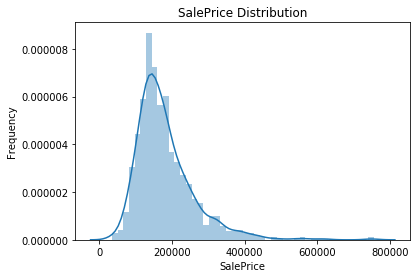

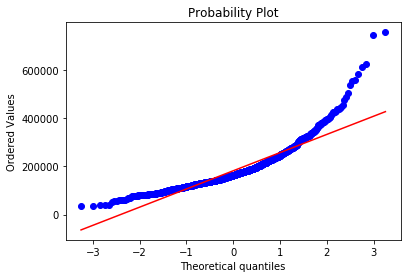

Skewness: 1.967


In [10]:
#histogram

sns.distplot(df_train['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

print("Skewness: {:.3f}".format(df_train['SalePrice'].skew()))

From the histogram grapth, we observe that the distribution is deviate from the normal distribution and it has a positive skew. It means that there is more weight in the left tail of the distribution: 25% houses owning the wide range of sale price, from 214,000 to 755,000, while 75% houses are sold in lower price ( < 214,000). 

To make the models work well, it's necessary to transform it into the normal distribution.

<div class="">
    <h4>1.2.2. Features</h4>
</div>

<div class="">
    <h4>1.2.2.1. Numerical features</h4>
</div>

Now we will check the relation between numerical features and sale prices using regression plot:

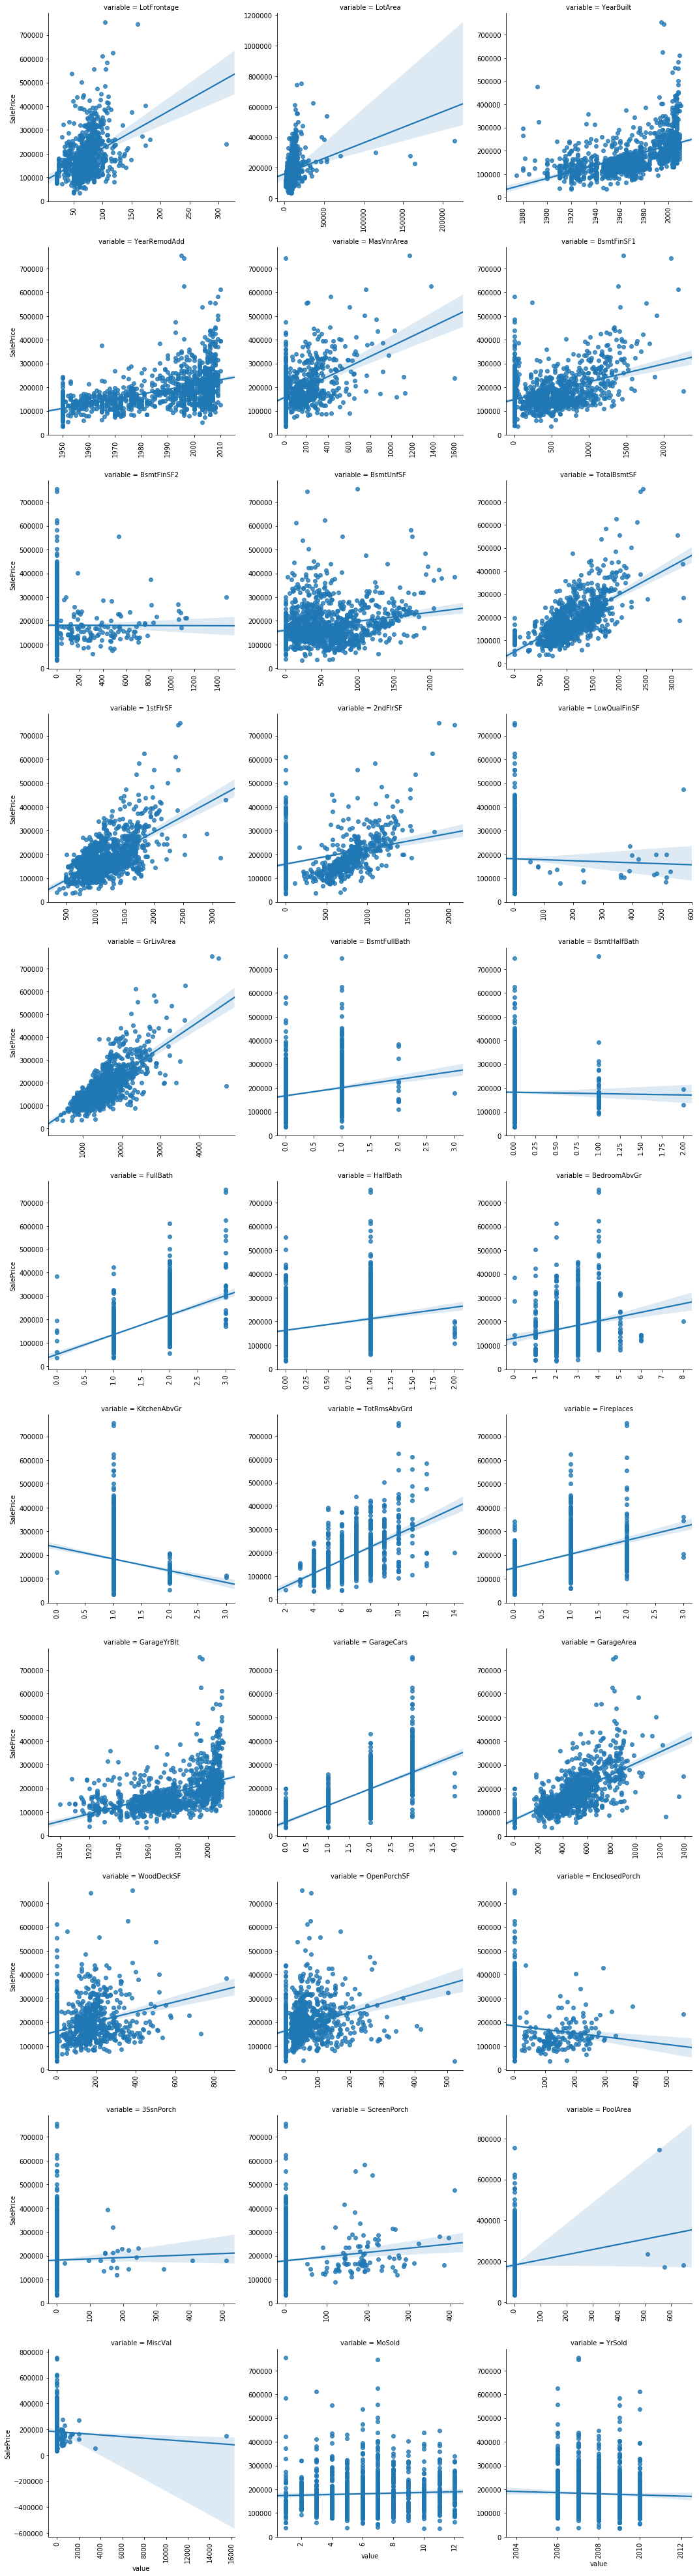

In [11]:
#Plot
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(regplot, "value", "SalePrice")
plt.show()

Check their distribution:

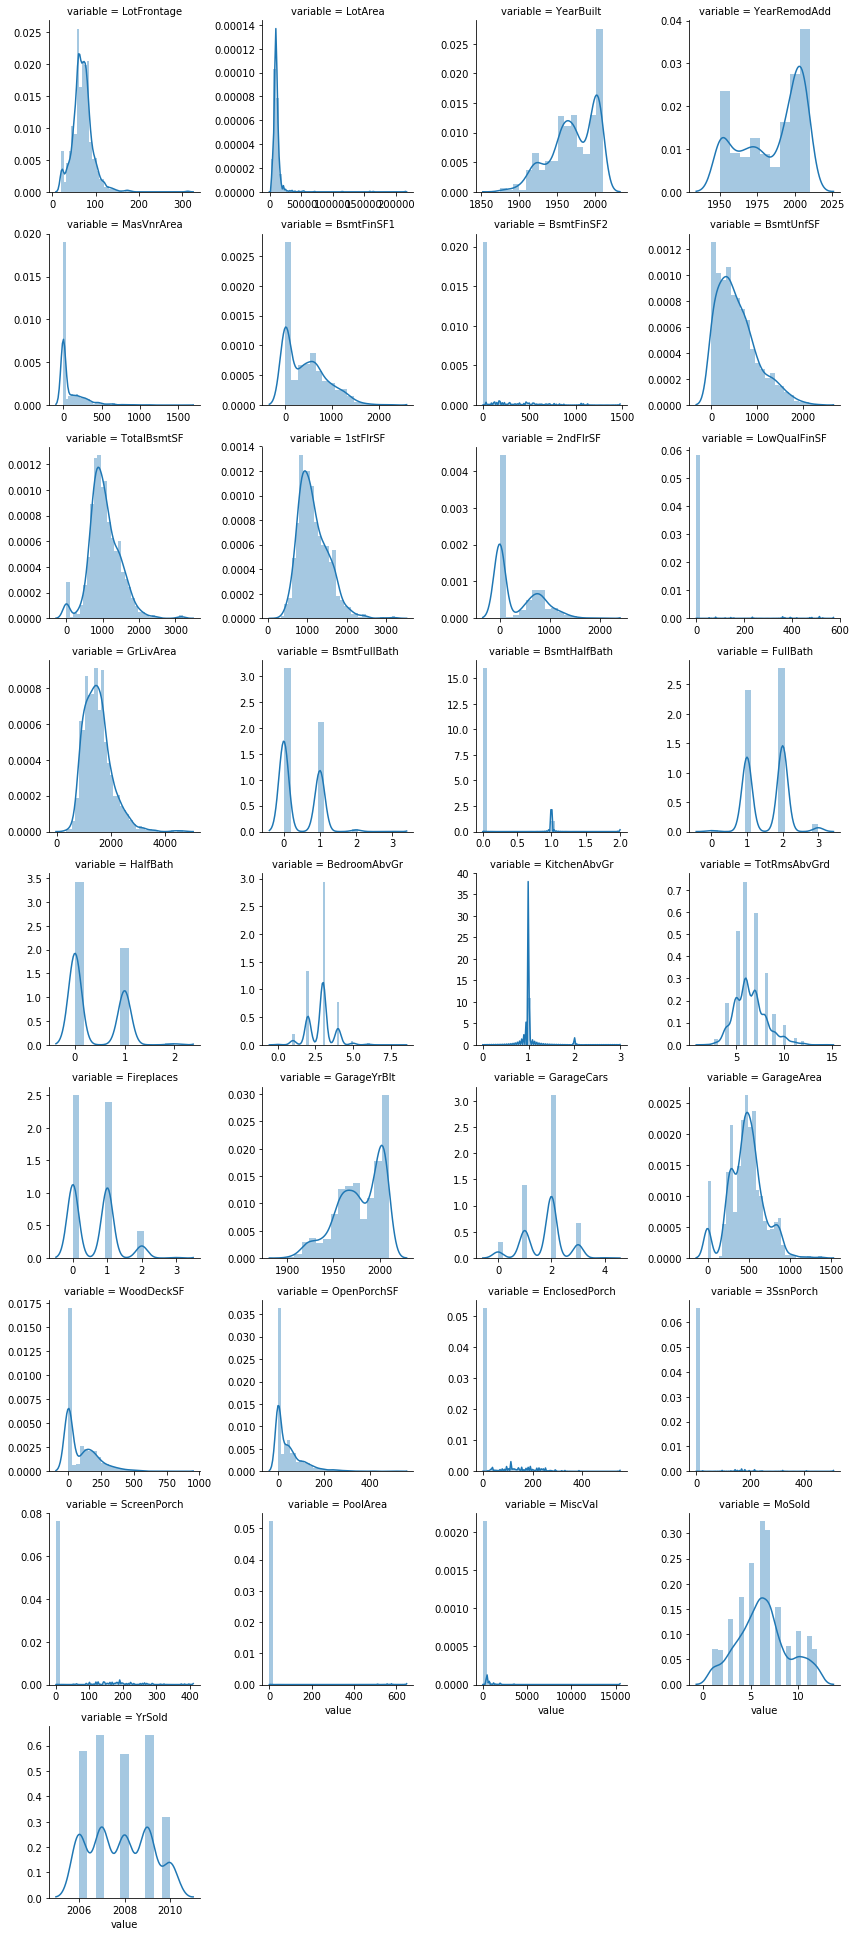

In [12]:
f = pd.melt(df_train, value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

<div class="">
    <h4>1.2.2.2. Categorical features</h4>
</div>

In the regression problems, we must transform categorical features into numerical features. Depend on the features' property (ordinal or nominal), we have different ways to handle these data.
Let's check their boxplot to see if our data is symmetrical, how tightly it is grouped.

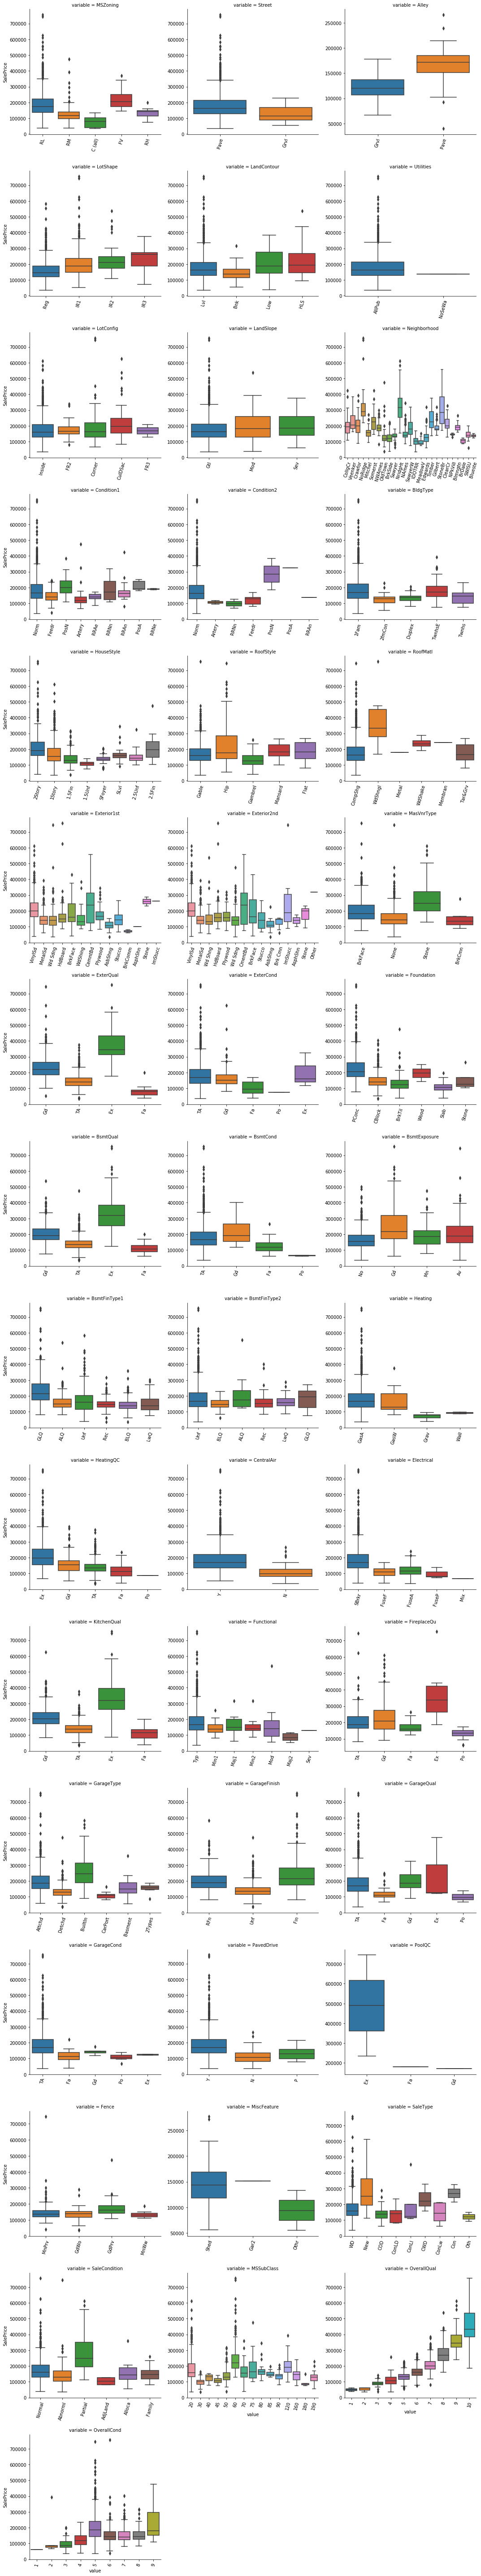

In [13]:
#Plot box plot
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")
plt.show()

Almost of ordinal features used to measure the quality of subject through values such as Excellent, Good, Average, Fair, Poor. Based on the description of features and their boxplot, we can find out the ordinal features and the values order to the sale prices for each one.

List of ordinal features:
- ExterCond 
- ExterQual 
- LandSlope 
- MasVnrType 
- BsmtExposure 
- BsmtFinType1 
- BsmtFinType2 
- BsmtQual  
- BsmtCond  
- HeatingQC 
- CentralAir
- KitchenQual 
- FireplaceQu  
- GarageQual  
- GarageCond  
- GarageFinish 
- PavedDrive
- PoolQC
- OverallQual
- OverallCond

Also in this plots, we can see that MSSubClass is a nominal feature, we must correct its type to string in the dataset.  

<div class="">
    <h4>1.2.3. Correlation</h4>
</div>

In this dataset, we have 80 features. To have a general understanding on the relationship between these features themselves and to the sale prices, assume they are linear we draw their correlation matrix as below:

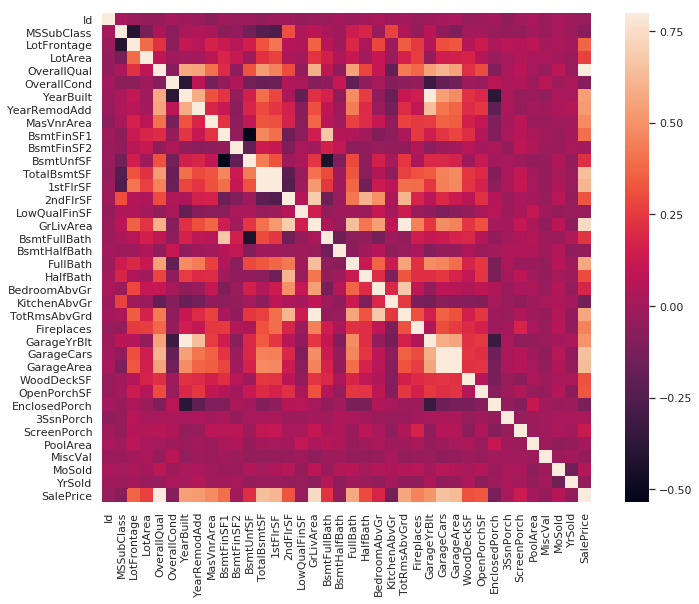

In [163]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


Focus on the bright squares which indicate a situation of strong correlation in the heat map, we point out that some of our independent variables are highly correlated to each other. Because in the regression problem it is required to meet assumptions of multicollinearity, we should take a deeper analysic on these variables to identify and keep the most important one only.

Let's highlight strong corelation: 

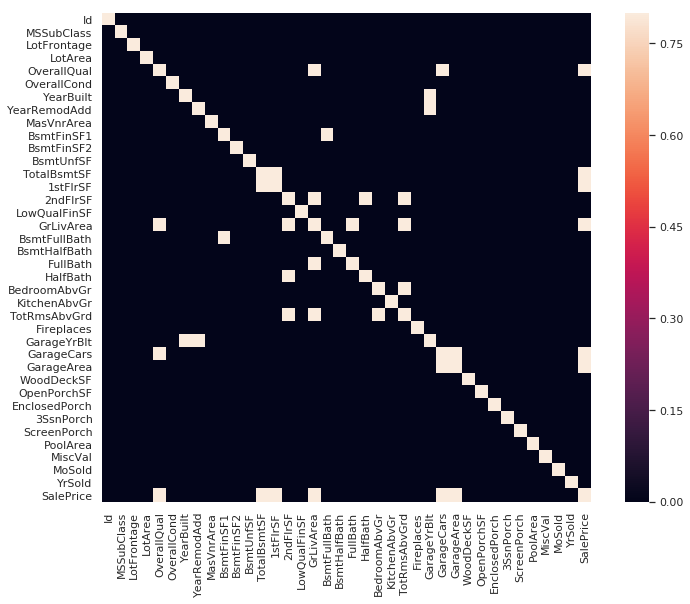

In [157]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat[:][:] > 0.6, vmax=.8, square=True);


The multicolinearlity occurs on following pairs of features:
- 1stFlrSF vs TotalBsmtSF: the area of first floor vs basement
- GarageCar vs GarageArea: the space of garage calculated by its capacity vs its area
- GarageYrBlt vs YearBuilt: the year garage is built vs the year the house is built
- GarageYrBlt vs YearRemodAdd: the year garage is built vs the year the house is remodeled
- TotRmsAbvGrd vs GrLiveArea: total rooms vs live area
- BsmtFullBath vs BsmtFinSF1

Now let's take a look on the most correlated features to sale prices

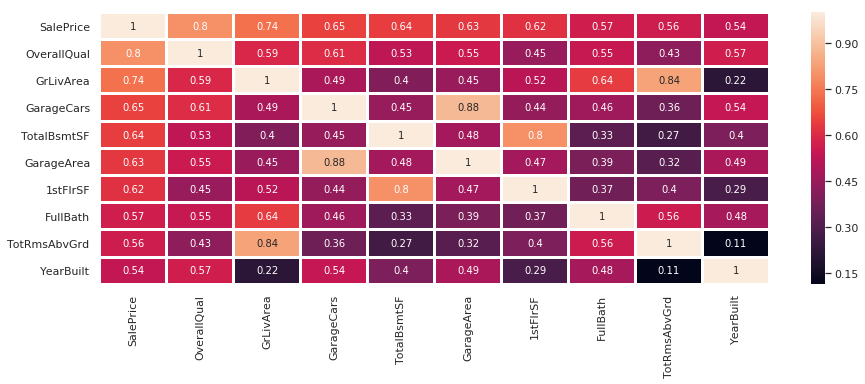

In [158]:
plt.figure(figsize=(15,5))

# correlation table
corr_train = df_train.corr()

# select top 10 highly correlated variables with SalePrice
num = 10
cols = corr_train.nlargest(num, 'SalePrice')['SalePrice'].index
coeff = np.corrcoef(df_train[cols].values.T)

# heatmap
heatmp = sns.heatmap(coeff, annot = True, xticklabels = cols.values, yticklabels = cols.values, linewidth=2)

Here we have list of most corelated features with the correlation value from 0.52 to 0.79:
- OverallQual
- GrLivArea
- TotalBsmtSF
- GarageCars
- GarageArea
- 1stFlrSF
- FullBath
- TotRmsAbvGrd
- YearBuild

As mentioned above, most of them are colinear to other by pair. We will keep features which have higher corelation values to sale prices.

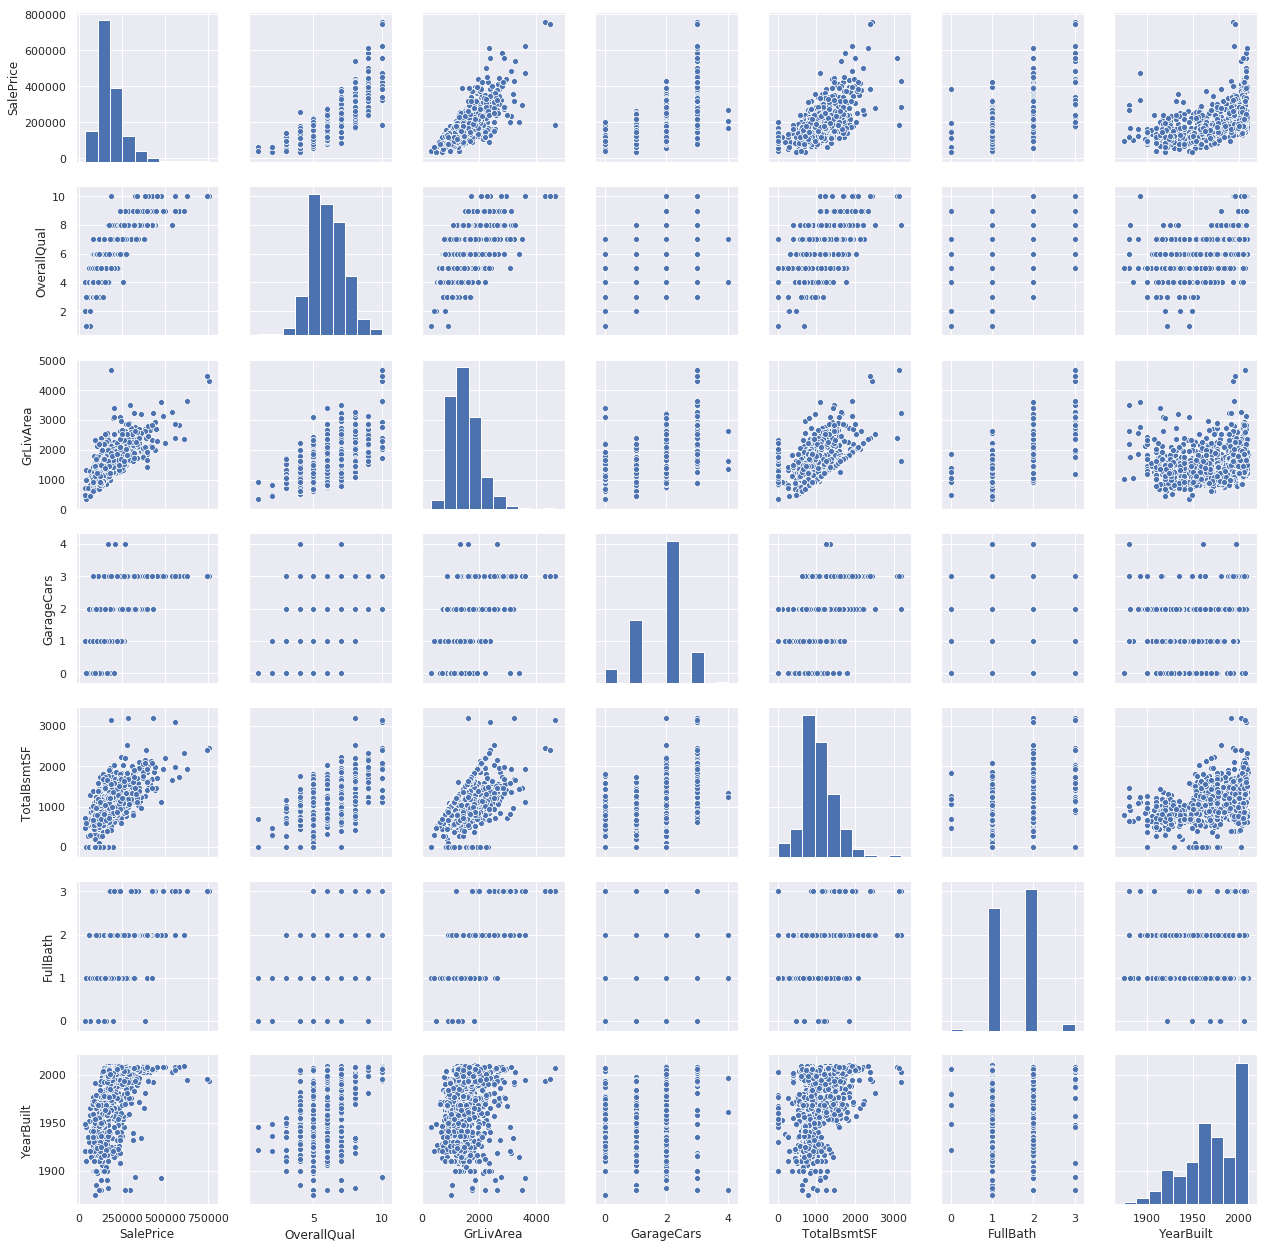

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

<div class="">
    <h3>2. Data Pre-processing</h3>
</div>

In this session we will manupulate data, it includes:
- Outlier
- Missing data
- Normalising and standardising
- Remove multicoliner
- Feature selection

<div class="">
    <h4>1.2.1. Outlier</h4>
</div>

In [12]:
#outlier
df_train = df_train[df_train["GrLivArea"] < 4000]

<div class="">
    <h4>1.2.2. Missing data</h4>
</div>

In [13]:
y_train = df_train['SalePrice']

df = pd.concat([df_train, df_test])
df = df.drop("SalePrice", axis=1)

#change type values for MSSubClass
df['MSSubClass'] = df.astype(str)

We check if we have NA values in both train dataset and test dataset:

In [14]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1451,0.995882
MiscFeature,1403,0.962938
Alley,1366,0.937543
Fence,1177,0.807824
FireplaceQu,690,0.473576
LotFrontage,259,0.177763
GarageFinish,81,0.055594
GarageCond,81,0.055594
GarageType,81,0.055594
GarageQual,81,0.055594


There are 20 features with NA values, 4 of them over 50% of all data. However, in this data set there are many features taking NA value to describe the lack of subject in the house, not kind of missing information. For example, NA means 'No alley access' in the feature Alley. We must exclude these cases when preprocessing data.

In [15]:
#replace na values to none
none_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for f in none_features:
    df[f] = df[f].fillna('None')

Now we begin to handle "real" missing data.
For other categorical features, we will impute missing data by their mode:

In [16]:
#replace na values to the mode
for f in categorical_features:
    if f not in none_features:
        f_mode = df[f].mode()[0]
        df[f] = df[f].fillna(f_mode)


For numerical features:
- MasVnrArea indicates the masonry veneer area in square feet. We assume that NA means no property in this house
- GarageYrBlt indicates the year garage is built. We assume that NA means no garage in this house.c

In [17]:
#replace missing values for numerical -- later
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)



For the LotFrontage, we get the median value of houses in the corresponding neighborhood

In [18]:
df.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                    mean median count
Neighborhood                         
Blmngtn        47.142857   43.0    14
Blueste        24.000000   24.0     2
BrDale         21.562500   21.0    16
BrkSide        57.509804   52.0    51
ClearCr        83.461538   80.0    13
CollgCr        71.682540   70.0   126
Crawfor        71.804878   74.0    41
Edwards        67.538462   65.0    91
Gilbert        79.877551   65.0    49
IDOTRR         62.500000   60.0    34
MeadowV        27.800000   21.0    15
Mitchel        70.083333   73.0    36
NAmes          76.462366   73.0   186
NPkVill        32.285714   24.0     7
NWAmes         81.288889   80.0    45
NoRidge        89.290323   90.0    31
NridgHt        81.881579   88.5    76
OldTown        62.788991   60.0   109
SWISU          58.913043   60.0    23
Sawyer         74.437500   71.0    48
SawyerW        71.500000   66.5    50
Somerst        64.666667   73.5    78
StoneBr        62.700000   61.5    20
Timber         80.133333   85.0    30
Veenker        59.714286   68.0     7

In [19]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Check again:

In [20]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(2)

,Total,Percent
YrSold,0,0.0
YearRemodAdd,0,0.0


<div class="">
    <h4>1.2.2. Handle categorical features</h4>
</div>

For ordinal feature

In [21]:
#handle categorical features => numerical features
#ordinal variables
quality_map = {'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0, "None": 0}
basement_map = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6, 'None': 0}
ordinal_maps = {
    "ExterCond": quality_map,
    "ExterQual": quality_map,
    "LandSlope": {'Gtl': 0, 'Mod': 1, 'Sev': 2, 'None': 0}, #noted
    "MasVnrType": {'None': 0, 'BrkCmn': 0, 'BrkFace': 1, 'Stone': 2, 'None': 0},
    "BsmtExposure": {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0, 'None': 0}, #
    "BsmtFinType1": basement_map, #
    "BsmtFinType2": basement_map, #
    "BsmtQual": quality_map, #
    "BsmtCond": quality_map, #
    "HeatingQC": quality_map,
    "CentralAir": {'N': 0, 'Y': 1, 'None': 0},
    "KitchenQual": quality_map,
    "FireplaceQu": quality_map, #
    "GarageQual": quality_map, #
    "GarageCond": quality_map, #
    "GarageFinish": {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3, 'None': 0}, #
    "PavedDrive": {'N': 0, 'P': 1, 'Y': 2, 'None': 0},
    "PoolQC": quality_map
}
for col_name, matching_map in ordinal_maps.items():
    df[col_name] = df[col_name].replace(matching_map)

For nonimal features

In [22]:
#nonimal variables
#one hot encoding
for col_name in categorical_features:
    if (col_name not in ordinal_maps.keys() and col_name not in ['OverallQual', 'OverallCond']):
        df = pd.concat([df, pd.get_dummies(df[col_name], prefix=col_name)], axis=1)
        df = df.drop(col_name, axis=1)

<div class="">
    <h4>1.2.3. Handle numerical features</h4>
</div>

For the numerical features:

In [23]:
skew_before = df[numerical_features].apply(lambda x: stats.skew(x.dropna()))
print(skew_before.sort_values())


GarageYrBlt      -3.860813
YearBuilt        -0.610002
YearRemodAdd     -0.500180
GarageCars       -0.343833
FullBath          0.016374
YrSold            0.092867
GarageArea        0.181048
BedroomAbvGr      0.214574
MoSold            0.215656
BsmtFullBath      0.598145
Fireplaces        0.650899
TotRmsAbvGrd      0.673046
HalfBath          0.681432
2ndFlrSF          0.774764
BsmtUnfSF         0.921538
GrLivArea         1.131594
1stFlrSF          1.321923
TotalBsmtSF       1.492672
WoodDeckSF        1.547364
BsmtFinSF1        1.676698
LotFrontage       2.225407
OpenPorchSF       2.332921
MasVnrArea        2.646951
EnclosedPorch     3.082631
ScreenPorch       4.113045
BsmtHalfBath      4.126368
BsmtFinSF2        4.245879
KitchenAbvGr      4.478508
LowQualFinSF      8.992490
3SsnPorch        10.282886
LotArea          12.302869
PoolArea         16.062340
MiscVal          24.426546
dtype: float64


In [24]:
#log transform
test = ['GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'LotArea', 'LotFrontage', 'KitchenAbvGr', 'GarageArea']
skewed_feats = df_train[numerical_features].apply(lambda x: stats.skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

for f in skewed_feats:
    df[f] = np.log1p(df[f].values)



<div class="">
    <h4>1.2.2. Add new features and remove multicolinear</h4>
</div>

In [25]:
#add new features?
df['HasBasement'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
#remove colinear variables #final step
multilinear = ['YearRemodAdd', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'TotalBsmtSF', 'TotRmsAbvGrd', 'BsmtFinSF1']
df = df.drop([], axis=1)

<div class="">
    <h4>1.2.2. Normalize data</h4>
</div>

For the sale prices:

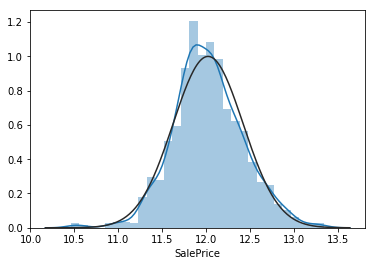

In [27]:
#Skewness
y_train = np.log1p(y_train)
sns.distplot(y_train, bins=30, fit=norm)
plt.show()

In [28]:
#split into train and test again
x_train = df.iloc[:df_train.shape[0]]
x_test = df.iloc[df_train.shape[0]:]



In [29]:
print(x_train.shape)
print(x_test.shape)

(1197, 986)
(260, 986)


<div class="">
    <h3>3. Model Selection</h3>
</div>

Perhaps the most important segment of this challenge involves the selection of a model that can successfully handle the given data and yield sensible predictions.
Instead of focusing exclusively on your final chosen model, it is also important to share your thought process in this notebook by additionally describing alternative candidate models.
There is a wealth of models to choose from, such as <i>decision trees</i>, <i>random forests</i>, <i>(Bayesian) neural networks</i>, <i>Gaussian processes</i>, <i>LASSO regression</i>, and so on.
There are several factors which may influence your decision:

- What is the model's complexity?
- Is the model interpretable?
- Is the model capable of handling different data-types?
- Does the model return uncertainty estimates along with predictions?

An in-depth evaluation of competing models in view of this and other criteria will elevate the quality of your submission and earn you a higher grade.



<div class="alert alert-warning">
    <p>The goal of House Prices is to predict the sale prices for a set of houses based on some information about them (including size, condition, location, etc). This data is small and has multiple features. We might choose to use a linear model, a decision tree or a neural network... We try different types of model to find the best model.</p>

<p><strong>Validation and cross validation:</strong></p>
<p>Our data is quite small so we can not use the spliting roughly 70% of the data for training and the remaining 30% for testing. Using a single train-test split of this kind will tend to give us a fairly rough estimate of the out-of-sample error. Therefore, we use approach to squeeze the most out of our data is known as k-fold cross validation. We use <i>cross_val_score</i> function to compute Root Mean Square Error to evaluate the performance of our simple linear regression.</p>
</div>

In [30]:
# Define Root Mean Square Error 
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5))
    return rmse

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

models = [LinearRegression(),
             Ridge(),
             Lasso(alpha=0.0005,max_iter=10000),
             RandomForestRegressor(max_features = 0.2, n_estimators = 1000),
             GradientBoostingRegressor(),
             SVR(),
             LinearSVR(),
             ElasticNet(alpha = 0.001,max_iter=10000),
             SGDRegressor(max_iter=1000, tol = 1e-3),
             BayesianRidge(),
             KernelRidge(alpha=0.6,kernel='polynomial',degree = 2,coef0=2.5),
             ExtraTreesRegressor(),
             XGBRegressor()
         ]

names = ['LR','Ridge','Lasso','RF','GBR','SVR','LSVR','ENet','SGDR','BayRidge','Kernel','XTreeR','XGBR']

In [52]:
for model,name in zip(models,names):
    score = rmse_cv(model,x_train,y_train)
    print("{}: {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR: 180447830.386588, 152396961.473016
Ridge: 0.118994, 0.010154
Lasso: 0.112410, 0.009199
RF: 0.135521, 0.012960
GBR: 0.122117, 0.009987
SVR: 0.398522, 0.023537
LSVR: 0.250495, 0.107823
ENet: 0.112654, 0.009143
SGDR: 7030773924560913.000000, 3027502853099612.500000
BayRidge: 0.114586, 0.009324
Kernel: 0.180735, 0.010314
XTreeR: 0.141469, 0.014909


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields CentralAir, ExterCond, ExterQual, HeatingQC, KitchenQual, LandSlope, PavedDrive


<div class="alert alert-warning">
    <p>Base on the score above we choose a linear model - <strong>Lasso</strong>, and a model based on decision trees - <strong>RandomForestRegressor</strong> to fit and validate our models, tune hyperparameters.</p>
</div>

<div class="">
    <h3>4. Parameter Optimisation</h3>
</div>

Irrespective of your choice, it is highly likely that your model will have one or more parameters that require tuning.
There are several techniques for carrying out such a procedure, including cross-validation, Bayesian optimisation, and several others.
As before, an analysis into which parameter tuning technique best suits your model is expected before proceeding with the optimisation of your model.

<h4>4.1 Random Forest model</h4>
<div class="alert alert-warning">
    <p>Random forest is an ensemble learning method for classification which takes a subset of observations and a subset of variables to build a decision trees. It builds multiple such decision tree and amalgamate them together to get a more accurate and stable prediction. Parameters in random forest are either to increase the predictive power of the model or to make it easier to train the model. We choose following parameters to talk about in more details:</p>
    
   <p><strong>max_features:</strong> These are the maximum number of features Random Forest is allowed to try in individual tree. Increasing max_features generally improves the performance of the model as at each node. There are multiple options available to assign maximum features: </p>

<li>Auto/None : This will simply take all the features which make sense in every tree.Here we simply do not put any restrictions on the individual tree.</li>
<li>sqrt : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree. ”log2″ is another similar type of option for max_features.</li>
<li>0.2 : This option allows the random forest to take 20% of variables in individual run. We can assign and value in a format “0.x” where we want x% of features to be considered.</li>

<p><strong>n_estimators:</strong> This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give better performance but makes the code slower. </p>

<p><strong>max_depth:</strong> The maximum depth of the tree. The dataset is no large so we can assume that our trees will have small depth. We can still decide to set the value of that parameter, to reduce memory consumption and the complexity of our regressor.</p>

</div>

In [55]:
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
model_RF = RandomForestRegressor()
parameters_RF = [{'max_features': [None, 'auto', 'sqrt', 0.2, 0.5, 0.8],
                     'n_estimators': [100, 500],
                     'max_depth': [None, 20, 40]}]
#Runing grid search cross validation with CV=5, scoring is neg_mean_squared_error since gridsearch will maximize score
clf_RF = GridSearchCV(model_RF, parameters_RF, cv=5, scoring="neg_mean_squared_error")
clf_RF.fit(x_train, y_train)
print("The best choise:", clf_RF.best_params_)

The best choise: {'max_depth': None, 'max_features': 0.5, 'n_estimators': 500}


In [76]:
t0=time()
model_RF_best = RandomForestRegressor(max_depth = clf_RF.best_params_['max_depth'], \
                                      max_features = clf_RF.best_params_['max_features'], \
                                      n_estimators = clf_RF.best_params_['n_estimators'])
model_RF_best.fit(x_train, y_train)
print("Training %s took %.3fs." % ("Random forest", (time() - t0)))

score_RF = rmse_cv(model_RF_best,x_train,y_train)
print("The best score:", score_RF.mean())

Training Random forest took 9.370s.
The best score: 0.13471004143917215


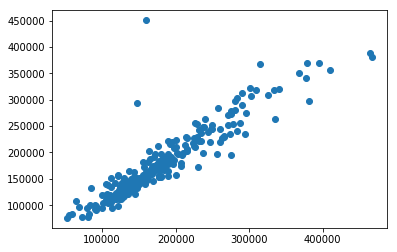

In [58]:
sub = pd.DataFrame()
sub['Id'] = x_test['Id']
prediction = clf.predict(x_test)
prediction = np.expm1(prediction)
sub['SalePrice'] = prediction
sub.to_csv('submission.csv',index=False)

df_test = pd.read_csv('challenge_data/train_1.csv')
y_compare = df_test[1200:].SalePrice
plt.scatter(y_compare, prediction)

<h4>4.2 Lasso model</h4>
<div class="alert alert-warning">
    <p>Lasso is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. Variables with a regression coefficient equal to zero after the shrinkage process are excluded from the model. Variables with non-zero regression coefficients variables are most strongly associated with the response variable. Explanatory variables can be either quantitative, categorical or both. We choose following parameters to talk about in more details:</p>
    
   <p><strong>alpha:</strong> The higher the alpha, the most feature coefficients are zero. When alpha is 0, Lasso regression produces the same coefficients as a linear regression. When alpha is very large, all coefficients are zero. In this experiment, we run lasso regressions, with varying levels of alpha to get the best alpha. </p>

<p><strong>max_iter:</strong> number of iterations run by the coordinate descent solver to reach the specified tolerance. </p>

</div>

In [59]:
# Set the parameters by cross-validation
model_Lasso = Lasso()
parameters_Lasso = {
    'alpha':[1, 0.1, 0.001, 0.0005], 
    'max_iter':range(500)
}
#Runing grid search cross validation with CV=5, scoring is neg_mean_squared_error since gridsearch will maximize score
clf_Lasso = GridSearchCV(model_Lasso, parameters_Lasso, cv=5, scoring="neg_mean_squared_error")
clf_Lasso.fit(x_train, y_train)
print("The best choise:",clf_Lasso.best_params_)

The best choise: {'alpha': 0.0005, 'max_iter': 328}


In [75]:
t0=time()
model_Lasso_best = Lasso(alpha = clf_Lasso.best_params_['alpha'], max_iter = clf_Lasso.best_params_['max_iter'])
model_Lasso_best.fit(x_train, y_train)
print("Training %s took %.3fs." % ("Lasso", (time() - t0)))

score_Lasso = rmse_cv(model_Lasso_best,x_train,y_train)
print("The best score:", score_Lasso.mean())

Training Lasso took 0.413s.
The best score: 0.11241001456417701


<div class="">
    <h3>5. Model Evaluation</h3>
</div>

Some form of pre-evaluation will inevitably be required in the preceding sections in order to both select an appropriate model and configure its parameters appropriately.
In this final section, you may evaluate other aspects of the model such as:

- Assessing the running time of your model;
- Determining whether some aspects can be parallelised;
- Training the model with smaller subsets of the data.
- etc.

<div class="alert alert-warning">
    <p>Obviously, the scores have an improvement. Lasso was the overall best model with better Root Mean Square Error score as well as the running time. As shown in the above figures, the Lassio takes around 0.413 seconds whereas running time of the Random forest is 9.3 second. In addition, the MSE's Lassion is 0.11 in comparision with 0.13 of Random forest. This low MSE value is achived by emploiting many data pre-process operations (such as normalization, feature selections, etc.). </p>
    <p>In our view, the operations to find the best parameters for the model could be performed in parallel to reduce the running time. Moreover, some small data processing itterating the whole could also be parallelised. </p>
    <p>To validate the model with smaller subsets of the data, we performed the cross-valiadation method that validate the stability of the machine learning model</p>
</div>

<div class="alert alert-danger">
    <b>N.B.</b> Please note that the items listed under each heading are neither exhaustive, nor are you expected to explore every given suggestion.
    Nonetheless, these should serve as a guideline for your work in both this and upcoming challenges.
    As always, you should use your intuition and understanding in order to decide which analysis best suits the assigned task.
</div>

<div class="">
    <h2>Submission Instructions</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;" />    
</div>

- The goal of this challenge is to construct a model for predicting house prices;
<br><br>

- Your submission will have two components:

    1. An <b>HTML version of your notebook</b> exploring the various modelling aspects described above;
    2. A CSV file containing your <b>final model's predictions on the given test data</b>. 
       This file should contain a header and have the following format:
       
        ```
        Id,SalePrice
        1461,169000.1
        1462,187724.1233
        1463,175221
        etc.
        ```
        
        An example submission file has been provided in the data directory of the repository.
        A leaderboard for this challenge will be ranked using the root mean squared error between the logarithm of the predicted value and the logarithm of the observed sales price. 
        Taking logs ensures that errors in predicting expensive houses and cheap houses will have a similar impact on the overall result;
<br><br>
- This exercise is due on <b>04/04/2019</b>.

In [78]:
sub = pd.DataFrame()
sub['Id'] = x_test['Id']
prediction = model_Lasso_best.predict(x_test)
prediction = np.expm1(prediction)
sub['SalePrice'] = prediction
sub.to_csv('submission.csv',index=False)

<div class="">
    <h2>Dataset Description</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;"/>    
</div>

#### * Files

* train.csv - The training dataset;
* test.csv - The test dataset;
* data_description.txt - Full description of each column.

#### * Attributes

A brief outline of the available attributes is given below:

* <i>SalePrice</i>: The property's sale price in dollars. This is the target variable that your model is intended to predict;

* <i>MSSubClass</i>: The building class;
* <i>MSZoning</i>: The general zoning classification;
* <i>LotFrontage</i>: Linear feet of street connected to property;
* <i>LotArea</i>: Lot size in square feet;
* <i>Street</i>: Type of road access;
* <i>Alley</i>: Type of alley access;
* <i>LotShape</i>: General shape of property;
* <i>LandContour</i>: Flatness of the property;
* <i>Utilities</i>: Type of utilities available;
* <i>LotConfig</i>: Lot configuration;
* <i>LandSlope</i>: Slope of property;
* <i>Neighborhood</i>: Physical locations within Ames city limits;
* <i>Condition1</i>: Proximity to main road or railroad;
* <i>Condition2</i>: Proximity to main road or railroad (if a second is present);
* <i>BldgType</i>: Type of dwelling;
* <i>HouseStyle</i>: Style of dwelling;
* <i>OverallQual</i>: Overall material and finish quality;
* <i>OverallCond</i>: Overall condition rating;
* <i>YearBuilt</i>: Original construction date;
* <i>YearRemodAdd</i>: Remodel date;
* <i>RoofStyle</i>: Type of roof;
* <i>RoofMatl</i>: Roof material;
* <i>Exterior1st</i>: Exterior covering on house;
* <i>Exterior2nd</i>: Exterior covering on house (if more than one material);
* <i>MasVnrType</i>: Masonry veneer type;
* <i>MasVnrArea</i>: Masonry veneer area in square feet;
* <i>ExterQualv</i>: Exterior material quality;
* <i>ExterCond</i>: Present condition of the material on the exterior;
* <i>Foundation</i>: Type of foundation;
* <i>BsmtQual</i>: Height of the basement;
* <i>BsmtCond</i>: General condition of the basement;
* <i>BsmtExposure</i>: Walkout or garden level basement walls;
* <i>BsmtFinType1</i>: Quality of basement finished area;
* <i>BsmtFinSF1</i>: Type 1 finished square feet;
* <i>BsmtFinType2</i>: Quality of second finished area (if present);
* <i>BsmtFinSF2</i>: Type 2 finished square feet;
* <i>BsmtUnfSF</i>: Unfinished square feet of basement area;
* <i>TotalBsmtSF</i>: Total square feet of basement area;
* <i>Heating</i>: Type of heating;
* <i>HeatingQC</i>: Heating quality and condition;
* <i>CentralAir</i>: Central air conditioning;
* <i>Electrical</i>: Electrical system;
* <i>1stFlrSF</i>: First Floor square feet;
* <i>2ndFlrSF</i>: Second floor square feet;
* <i>LowQualFinSF</i>: Low quality finished square feet (all floors);
* <i>GrLivArea</i>: Above grade (ground) living area square feet;
* <i>BsmtFullBath</i>: Basement full bathrooms;
* <i>BsmtHalfBath</i>: Basement half bathrooms;
* <i>FullBath</i>: Full bathrooms above grade;
* <i>HalfBath</i>: Half baths above grade;
* <i>Bedroom</i>: Number of bedrooms above basement level;
* <i>Kitchen</i>: Number of kitchens;
* <i>KitchenQual</i>: Kitchen quality;
* <i>TotRmsAbvGrd</i>: Total rooms above grade (does not include bathrooms);
* <i>Functional</i>: Home functionality rating;
* <i>Fireplaces</i>: Number of fireplaces;
* <i>FireplaceQu</i>: Fireplace quality;
* <i>GarageType</i>: Garage location;
* <i>GarageYrBlt</i>: Year garage was built;
* <i>GarageFinish</i>: Interior finish of the garage;
* <i>GarageCars</i>: Size of garage in car capacity;
* <i>GarageArea</i>: Size of garage in square feet;
* <i>GarageQual</i>: Garage quality;
* <i>GarageCond</i>: Garage condition;
* <i>PavedDrive</i>: Paved driveway;
* <i>WoodDeckSF</i>: Wood deck area in square feet;
* <i>OpenPorchSF</i>: Open porch area in square feet;
* <i>EnclosedPorch</i>: Enclosed porch area in square feet;
* <i>3SsnPorch</i>: Three season porch area in square feet;
* <i>ScreenPorch</i>: Screen porch area in square feet;
* <i>PoolArea</i>: Pool area in square feet;
* <i>PoolQC</i>: Pool quality;
* <i>Fence</i>: Fence quality;
* <i>MiscFeature</i>: Miscellaneous feature not covered in other categories;
* <i>MiscVal</i>: Value (in dollars) of miscellaneous feature;
* <i>MoSold</i>: Month sold;
* <i>YrSold</i>: Year sold;
* <i>SaleType</i>: Type of sale;
* <i>SaleCondition</i>: Condition of sale.
